In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data and make copy of it for Analysis
covid_test_raw=pd.read_csv("/content/corona_tested_006.csv")
df=covid_test_raw.copy()


<ipython-input-2-8695d77706e2>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_test_raw=pd.read_csv("/content/corona_tested_006.csv")


In [ ]:
df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
df.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [4]:
## let see number of rows and columns
df.shape

(278848, 11)

In [5]:
# check detail of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


1. As we see here all column are Object data type accept
Ind_id which is int type.
2.Till now there is no null values in Any Columns .

In [6]:
# checking insight details of columns
df.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. As we see here most of the peoples are negetive .
2. There is many uniques value is different columns.So let see individualy the unique values in columns.

In [7]:
# Total column names.
df.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

**Here our corona column is report column i.e Our outcome column**

In [8]:
# checking unique values in each columns.
df.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

1. From this report we see lots of impurities in our data.
2. In sex column intead of 2 unique values there is 3 values.
3. Similarly in Corona (report) column there is 3 values instead of 2 unique values.
  

## Data cleaning

In [9]:
# First of all we will drop the unwanted columns
df=df.drop(['Ind_ID'],axis=1)

In [10]:
# Renaming our dependent variable / outcome variable .
df.rename(columns={'Corona':'Corona_report'},inplace = True)

In [11]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_report,Age_60_above,Sex,Known_contact
0,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [12]:
# lets chck types of unique values in columns.
pd.Series({c: df[c].unique() for c in df})

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                          [TRUE, FALSE, None, False, True]
Fever                                   [FALSE, TRUE, None, False, True]
Sore_throat                             [TRUE, FALSE, None, False, True]
Shortness_of_breath                     [FALSE, TRUE, None, False, True]
Headache                                [FALSE, TRUE, None, False, True]
Corona_report                                [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object

Insights

1.Here we find lots of None values in maximum columns. So we have to check it.

2.Also there is repetation of data in form of upper case &
lower case, we have to make it True or False.

3.Lots of null values but not recorgnise as null we have to clean it.

In [13]:

df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x:True if x == 'TRUE' else x)
df['Cough_symptoms']=df['Cough_symptoms'].apply(lambda x:False if x == 'FALSE' else x)
df['Fever']=df['Fever'].apply(lambda x:True if x== 'TRUE' else x)
df['Fever']=df['Fever'].apply(lambda x:False if x== 'FALSE' else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x:True if x== 'TRUE' else x)
df['Sore_throat']=df['Sore_throat'].apply(lambda x:False if x== 'FALSE' else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x:True if x== 'TRUE' else x)
df['Shortness_of_breath']=df['Shortness_of_breath'].apply(lambda x:False if x== 'FALSE' else x)
df['Headache']=df['Headache'].apply(lambda x:True if x== 'TRUE' else x)
df['Headache']=df['Headache'].apply(lambda x:False if x== 'FALSE' else x)

In [14]:
pd.Series({c: df[c].unique() for c in df})

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                                       [True, False, None]
Fever                                                [False, True, None]
Sore_throat                                          [True, False, None]
Shortness_of_breath                                  [False, True, None]
Headache                                             [False, True, None]
Corona_report                                [negative, positive, other]
Age_60_above                                             [None, No, Yes]
Sex                                                 [None, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object

In [15]:
for c in df.columns:
    #print("---- %s ---" % c)
    print(df[c].value_counts())

20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020     3565
23-03-2020     3494
19-03-2020     2243
18-03-2020     1991
20-03-2020     1870
21-03-2020     1648
17-03-2020     1463
16-03-2020     1304
15-03-2020      985
13-03-2020      686
12-03-2020      634
14-03-2020      609


In [16]:
# Dropping rows with None value in column
df = df[df.Cough_symptoms != "None"]
df = df[df.Fever != "None"]
df = df[df.Sore_throat != "None"]
df = df[df.Shortness_of_breath != "None"]
df = df[df.Headache != "None"]



In [17]:
df['Cough_symptoms'].value_counts()

False    236368
True      42226
Name: Cough_symptoms, dtype: int64

In [18]:
df['Fever'].value_counts()

False    256843
True      21751
Name: Fever, dtype: int64

In [19]:
df['Sore_throat'].value_counts()

False    276672
True       1922
Name: Sore_throat, dtype: int64

In [20]:
df['Headache'].value_counts()

False    276186
True       2408
Name: Headache, dtype: int64

In [21]:
df['Corona_report'].value_counts()

negative    260008
positive     14694
other         3892
Name: Corona_report, dtype: int64

Here we see that In corona_report column there is other value also rather that negative and positive,but we have to train our algorithm for Negative and Positive thus we have to remove other values.

In [22]:
df['Age_60_above'].value_counts()

None    127315
No      125504
Yes      25775
Name: Age_60_above, dtype: int64

In [23]:
df['Sex'].value_counts()

female    130030
male      129012
None       19552
Name: Sex, dtype: int64

Insights
1.After deleting none values now columns are clean .

2.Here we see that there is Other values in corona_report column. Also Age_60_above has none value of very large amount.Sex column has also none values .This is because perhaps many dont want to share tere details.

In [24]:
# Renaming None values as unknown
df['Corona_report'] = df['Corona_report'].apply(lambda x : "Unknown" if x == 'None' else x)
df['Age_60_above'] = df['Age_60_above'].apply(lambda x : "Unknown" if x == 'None' else x)
df['Sex'] = df['Sex'].apply(lambda x : "Unknown" if x == 'None' else x)


In [25]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_report,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed


In [26]:
df = df[df.Corona_report != "other"]
df['Corona_report'].value_counts()

negative    260008
positive     14694
Name: Corona_report, dtype: int64

In [32]:
#Saving clean data
df.to_csv('/content/covid_clean_data. csv', index=False)

***EDA- Exploratory Data Analysis***

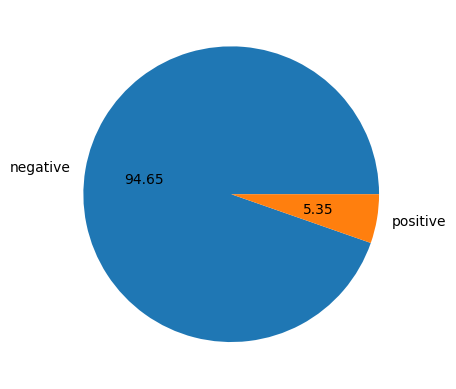

In [38]:
plt.pie(df['Corona_report'].value_counts(),labels=['negative','positive'],autopct = "%0.2f")
plt.show()

***Lets check relationship btw independent and dependent variabl.***

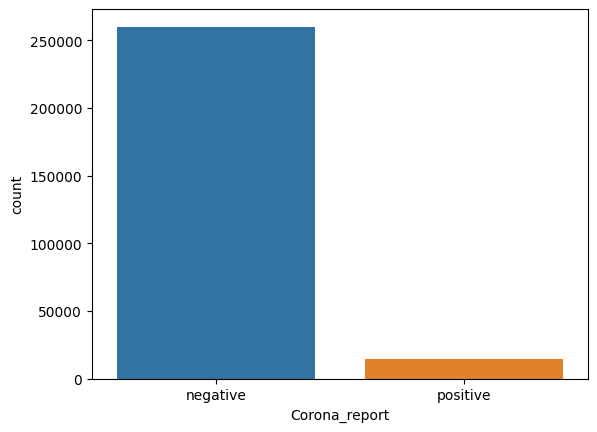

In [39]:
sns.countplot(data=df,x='Corona_report')
plt.show()

From Graph it is v ery clear that number of Positive individual are very less.

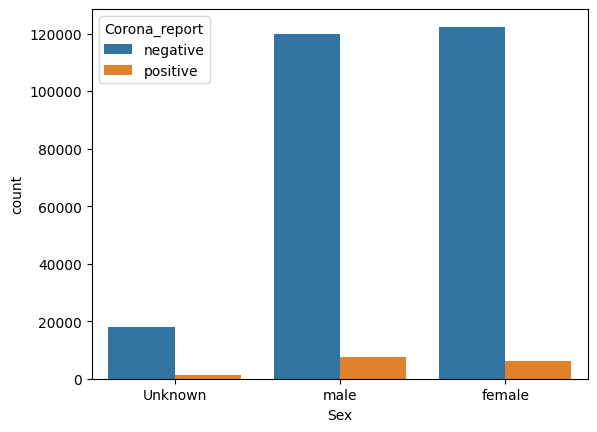

In [40]:
sns.countplot(x ='Sex',hue = "Corona_report", data = df)
plt.show()

From this graph we see that,there is nothing like male is more positicve or negetive or female is like such thing.

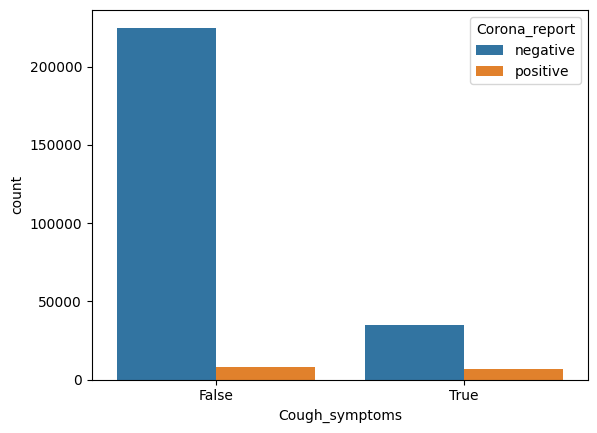

In [41]:
sns.countplot(x ='Cough_symptoms',hue = "Corona_report", data = df)
plt.show()

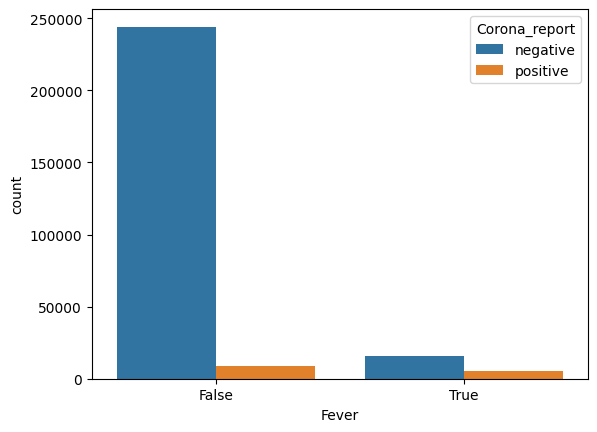

In [42]:
sns.countplot(x ='Fever',hue = "Corona_report", data = df)
plt.show()

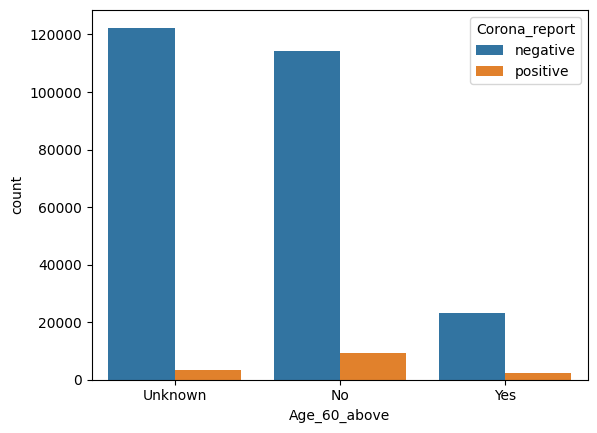

In [43]:
sns.countplot(x ='Age_60_above',hue = "Corona_report", data = df)
plt.show()

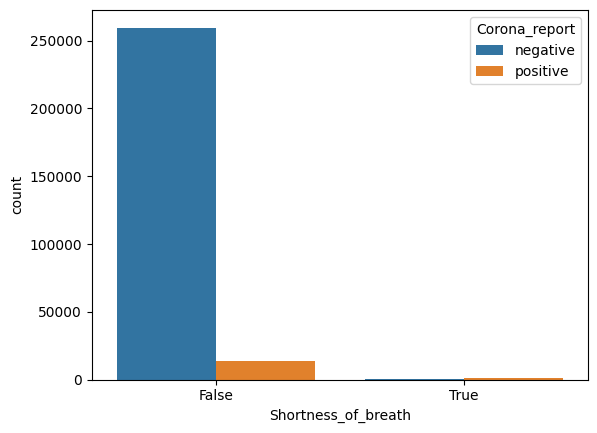

In [44]:
sns.countplot(x ='Shortness_of_breath',hue = "Corona_report", data = df)
plt.show()

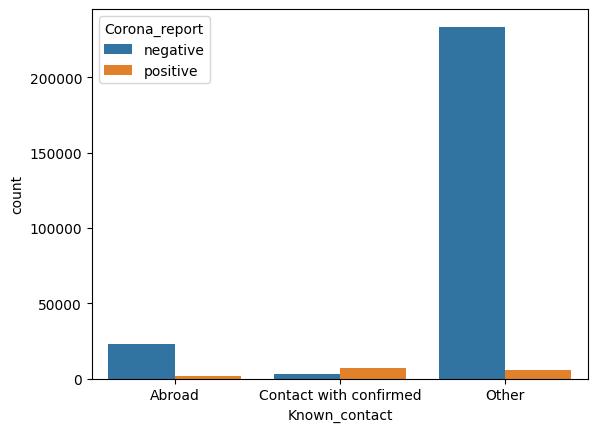

In [45]:
sns.countplot(x ='Known_contact',hue = "Corona_report", data = df)
plt.show()

*** Insights***

1.After see this different graph we say that covid negetive  person and covid positive person both has similar symptoms.

2.Persons Age above 60 has less number of positive report than age below 60.

3.Person with positive report are more who ,come in contact with confirmed known_contact/Positive Patient than abroad person.

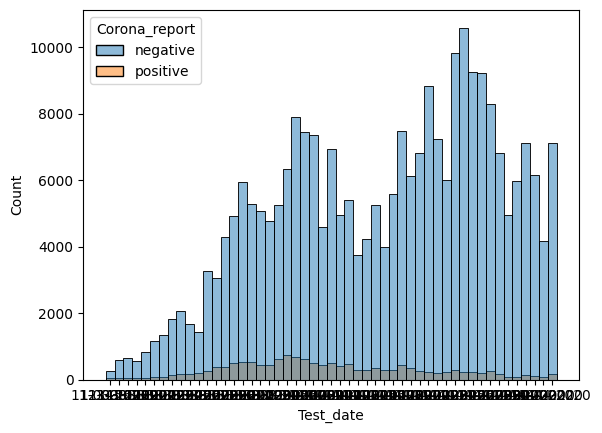

In [46]:
sns.histplot(x ='Test_date',hue = "Corona_report", bins=10,data = df)
plt.show()

1.From this graph we observe that,there is more positive cases in starting phase and slowly cases are becomeing less in ending dates.

2.That means cases are high during March ending and April starting phase ans slowly rate of postive cases are down at end of April months.

In [47]:
df['Corona_report'].unique()

array(['negative', 'positive'], dtype=object)

In [48]:
pd.Series({c: df[c].unique() for c in df})

Test_date              [11-03-2020, 12-03-2020, 13-03-2020, 14-03-202...
Cough_symptoms                                             [True, False]
Fever                                                      [False, True]
Sore_throat                                                [True, False]
Shortness_of_breath                                        [False, True]
Headache                                                   [False, True]
Corona_report                                       [negative, positive]
Age_60_above                                          [Unknown, No, Yes]
Sex                                              [Unknown, male, female]
Known_contact                    [Abroad, Contact with confirmed, Other]
dtype: object

***All the columns are in object or boolean form and it needs to be converted into numerical data type as model understands only numerical values.
Let's convert the values into numercal values through label_encoding.***

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le=LabelEncoder()

In [51]:
df['Cough_symptoms'] = le.fit_transform(df[['Cough_symptoms']])
df['Fever'] = le.fit_transform(df[['Fever']])
df['Sore_throat'] = le.fit_transform(df[['Sore_throat']])
df['Shortness_of_breath'] = le.fit_transform(df[['Shortness_of_breath']])
df['Headache'] = le.fit_transform(df[['Headache']])
df['Age_60_above'] = le.fit_transform(df[['Age_60_above']])
df['Sex'] = le.fit_transform(df[['Sex']])
df['Known_contact'] = le.fit_transform(df[['Known_contact']])


df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_report,Age_60_above,Sex,Known_contact
0,11-03-2020,1,0,1,0,0,negative,1,0,0
1,11-03-2020,0,1,0,0,0,positive,1,0,0
2,11-03-2020,0,1,0,0,0,positive,1,0,0
3,11-03-2020,1,0,0,0,0,negative,1,0,0
4,11-03-2020,1,0,0,0,0,negative,1,0,1


In [52]:
#df['Corona_report'] = df['Corona_report'].map({'negative' : 0 , 'positive' : 1})

In [53]:
df.head(10)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_report,Age_60_above,Sex,Known_contact
0,11-03-2020,1,0,1,0,0,negative,1,0,0
1,11-03-2020,0,1,0,0,0,positive,1,0,0
2,11-03-2020,0,1,0,0,0,positive,1,0,0
3,11-03-2020,1,0,0,0,0,negative,1,0,0
4,11-03-2020,1,0,0,0,0,negative,1,0,1
6,11-03-2020,0,0,0,0,0,negative,1,0,2
7,11-03-2020,0,1,0,0,0,negative,1,0,0
8,11-03-2020,1,0,0,0,0,negative,1,0,0
9,11-03-2020,1,0,1,0,0,negative,1,0,0
10,11-03-2020,1,0,1,0,0,negative,1,0,0


Finding Correlation btw columns

In [54]:
df.corr()

<ipython-input-54-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
Cough_symptoms,1.000000,0.453797,0.115613,0.106330,0.116730,-0.064512,0.032537,-0.571655
Fever,0.453797,1.000000,0.122233,0.125840,0.169774,-0.026195,0.025874,-0.348229
Sore_throat,0.115613,0.122233,1.000000,0.195181,0.323343,-0.036781,-0.032192,-0.088699
Shortness_of_breath,0.106330,0.125840,0.195181,1.000000,0.202082,-0.010114,-0.039852,-0.074619
Headache,0.116730,0.169774,0.323343,0.202082,1.000000,-0.052285,-0.008858,-0.091871
Age_60_above,-0.064512,-0.026195,-0.036781,-0.010114,-0.052285,1.000000,0.010818,0.076329
Sex,0.032537,0.025874,-0.032192,-0.039852,-0.008858,0.010818,1.000000,-0.020027
Known_contact,-0.571655,-0.348229,-0.088699,-0.074619,-0.091871,0.076329,-0.020027,1.000000


<ipython-input-55-edd46bf9ed70>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')


<Axes: >

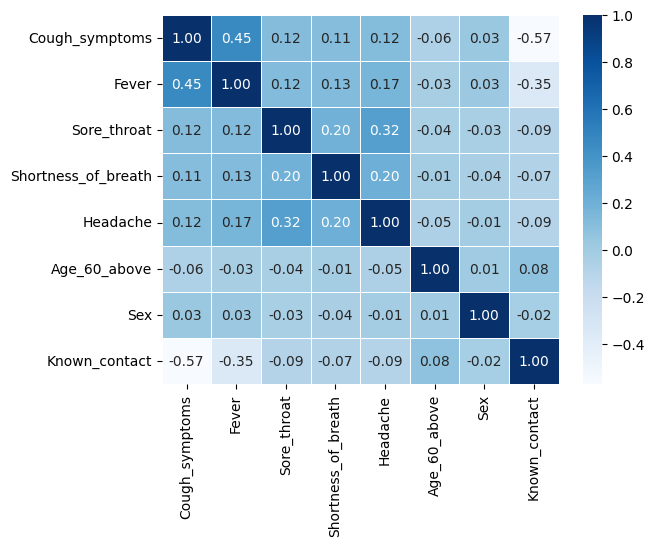

In [55]:
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')

From Heatmap we observe that All features are mloderately corelated with Each other.

*** Train-Test Split based on date***

As per our business requirement, I am taking 11 March 2020 to 15 April 2020 as Training and validation set and 16 April 2020 to 30 April 2020 as Test Set.

In [56]:
##changing the datatype of Test_date from object to Datetime

df['Test_date'] = pd.to_datetime(df["Test_date"] , format = '%d-%m-%Y')
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona_report,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,negative,1,0,0
1,2020-03-11,0,1,0,0,0,positive,1,0,0
2,2020-03-11,0,1,0,0,0,positive,1,0,0
3,2020-03-11,1,0,0,0,0,negative,1,0,0
4,2020-03-11,1,0,0,0,0,negative,1,0,1


In [57]:
 #breaking data on basis of date
break_date = pd.Timestamp("2020-04-15")
df_train = df[df["Test_date"] <= break_date]
df_test = df[df["Test_date"] > break_date]

In [58]:
X_train= df_train.drop(columns = ['Test_date','Corona_report'],axis = 1)
y_train=df_train['Corona_report']

In [59]:
X_test = df_test.drop(columns = ['Test_date','Corona_report'],axis=1)
y_test = df_test['Corona_report']

In [60]:
# We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1 which means 20%.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state= 8)

In [61]:
# Training Set

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# Test Set

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Validation Set

print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (128370, 8)
y_train shape: (128370,)
X_test shape: (114239, 8)
y_test shape: (114239,)
X_val shape: (32093, 8)
y val shape: (32093,)


In [62]:
# performing transformation of data.

from sklearn.preprocessing import StandardScaler
stc = StandardScaler()
X_train=stc.fit_transform(X_train)
X_train

array([[-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       ...,
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789]])

In [63]:
X_test=stc.transform(X_test)
X_test

array([[ 2.14460242, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 , -2.70955325],
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 , -2.70955325],
       ...,
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ...,  0.82519236,
        -0.5147289 ,  0.41672789]])

 **Building Algorithm**

 1.Logistic Regression-

 Logistic regression is a statistical method used to analyze a data set in which there are one or more independent variables that determine an outcome. It is commonly used for binary classification problems, where the goal is to predict one of two possible outcomes.


In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
### Passing independant and dependant training data to the model
lr.fit(X_train,y_train)

LogisticRegression()

In [65]:
lr_pred=lr.predict(X_test)
print(lr_pred)

['negative' 'negative' 'negative' ... 'negative' 'negative' 'negative']


Now we have to check and compare our accuracy for our model.

In [67]:
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train, y_train))
print("Accuracy (Test) score of Logistic Regression is", lr.score(X_test, y_test))
print("Accuracy (Test) score of Logistic Regression is", accuracy_score(y_test, lr_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, lr_pred))

Train accuracy of Logistic Regression is 0.9435927397366987
Accuracy (Test) score of Logistic Regression is 0.9761902677719518
Accuracy (Test) score of Logistic Regression is 0.9761902677719518
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99    111541
    positive       0.25      0.00      0.01      2698

    accuracy                           0.98    114239
   macro avg       0.61      0.50      0.50    114239
weighted avg       0.96      0.98      0.96    114239



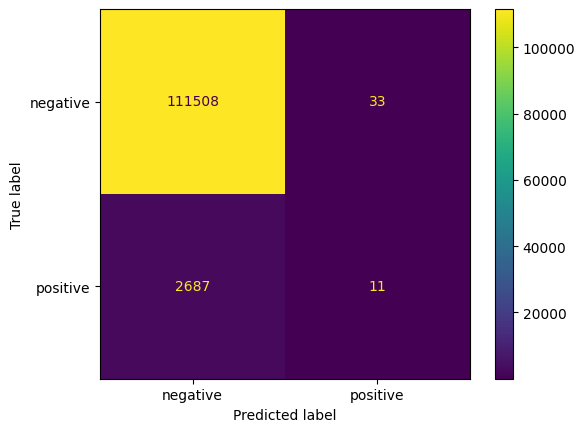

In [71]:
 from sklearn.metrics import ConfusionMatrixDisplay
 log_cm = confusion_matrix(y_test, lr_pred, labels=lr.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=lr.classes_)
log_disp.plot(values_format='')

# Display plot
plt.show()

***Here we observe that accuracy of our Logistic regression model is 97.6%***

***2.Decision Tree Algorithm***

One of the widely used supervised type machine learning methods for classification and regression is the decision tree algorithm. It also known as classification and regression tree (CART).

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation
from sklearn import tree

In [ ]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train,y_train)

In [ ]:
dt = dt.fit(X_train,y_train)

In [ ]:
dt_pred=dt.predict(X_test)

In [ ]:
# Train score and Test score of Decision Tree
print("Train accuracy of Decision Tree is", dt.score(X_train, y_train))
print("Accuracy (Test) score of Decision Tree is", dt.score(X_test, y_test))
print("Accuracy (Test) score of Decision Tree is", accuracy_score(y_test, dt_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, dt_pred))

Train accuracy of Decision Tree is 0.9594531432577705
Accuracy (Test) score of Decision Tree is 0.9850401351552447
Accuracy (Test) score of Decision Tree is 0.9850401351552447
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.75      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.81    114239
weighted avg       0.98      0.99      0.98    114239



** Here Accuracy of our Decision Tree model is 98.5%**

***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
## Making prediction on test dataset
rf_pred=rf.predict(X_test)

In [ ]:
# Train score and Test score of Random Forest
print("Train accuracy of Random Forest is", rf.score(X_train, y_train))
print("Accuracy (Test) score of Random Forest is", rf.score(X_test, y_test))
print("Accuracy (Test) score of Random Forest is", accuracy_score(y_test, rf_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, rf_pred))

Train accuracy of Random Forest is 0.9594531432577705
Accuracy (Test) score of Random Forest is 0.9850138744211696
Accuracy (Test) score of Random Forest is 0.9850138744211696
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    111541
           1       0.74      0.56      0.64      2698

    accuracy                           0.99    114239
   macro avg       0.87      0.78      0.81    114239
weighted avg       0.98      0.99      0.98    114239



** Accuracy of Our Random Forest Model is 98.5%

***KNeighbors Classifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred=knn.predict(X_test)

In [ ]:
# Train score and Test score of KNN
print("Train accuracy of KNN is", knn.score(X_train, y_train))
print("Accuracy (Test) score of KNN is", knn.score(X_test, y_test))
print("Accuracy (Test) score of KNN is", accuracy_score(y_test, knn_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_pred))

Train accuracy of KNN is 0.9572407883461868
Accuracy (Test) score of KNN is 0.981267343026462
Accuracy (Test) score of KNN is 0.981267343026462
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    111541
           1       0.76      0.30      0.43      2698

    accuracy                           0.98    114239
   macro avg       0.87      0.65      0.71    114239
weighted avg       0.98      0.98      0.98    114239



** Here Accuracy of our KNeighborsClassifier is 98%

***Conclusion*** :
After testing and evaluating the data from different algorithm. I have came to the conclusion that Logistic Regression gives us the least accuracy i.e. 97% and Random Forest , Decision Tree algorithm gives us an accuracy of 98.5%,KNeighborsClassifier gives 98% So we can use any of these 3 models.